In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

A module is a layer in a neural network like a convolutional layer or a recurrent layer. A model is the architecture of an instance of the neural network used in deep learning.

In the context of deep learning, a framework is a library with prebuilt functions that help simplify the process of developing and training the model.

OS stands for operating systems which is a framework that enables users to interact with the opeating system allowing users to perform operations related to file manipulation, managing file pathes, checking file expentions, etc.

Keras is an open source and hish level API(a set of rules that allow 1 model to relate with the other) that runs on top of tensor flow and provides a friendly interface for building neural networks.

imghdr(image header) is a python module that provides information on a type of image based of its header. So it helps in identifying the image format without the extension.

Open CV is an open source computer vision an image processing library. It provides tools for image and video processing.

In [2]:
data_dir = 'sample corn'

# Load the image dataset
data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    seed=42,
    validation_split=0.2,
    subset="training",
    shuffle=True
)

# Get the class names
class_names = data.class_names

# Get the number of classes
num_classes = len(class_names)

# Split the dataset into training and validation sets
train = data
val = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    seed=42,
    validation_split=0.2,
    subset="validation",
    shuffle=True
)

Found 240 files belonging to 4 classes.
Using 192 files for training.
Found 240 files belonging to 4 classes.
Using 48 files for validation.


The indexes are assigned in alphabetical order of the files in the directory.

Build Deep Learning Model

AUTOTUNE is a constant representing a special value used in TensorFlow for optimizing the performance of data loading.

'train' and 'val' are datasets, and 'prefetch' is a method that allows TensorFlow to asynchronously load batches of data while the model is training or validating.

'Sequential' is a class in Keras (which is integrated into TensorFlow) used for creating a linear stack of layers. It's a convenient way to build neural network models layer by layer.


- Convolution: Convolution is an operation that is commonly used in image processing tasks. It involves sliding a small window called a kernel or filter over the input data and performing some mathematical operations. In this case, the `Conv2D` layer performs convolution on 2D spatial data, which could be an image or any other type of 2D data.

- Filters: Filters are like feature detectors. They are small matrices that capture specific patterns or features from the input data. In this case, the `Conv2D` layer has 32 filters. Each filter is a 3x3 matrix, meaning it's a grid of numbers with 3 rows and 3 columns. These filters are going to be learned during the training process and will help extract different features from the input data.

- ReLU activation function: The ReLU (Rectified Linear Unit) activation function is a popular choice for introducing non-linearity in deep learning models. It applies a simple rule: if the input value is positive, it keeps it unchanged, and if the input value is negative, it sets it to zero. The ReLU activation function is widely used because it helps the network learn complex patterns and improves training speed.

- Input shape: The `input_shape` parameter defines the shape of the input data that will be fed into the `Conv2D` layer. It's important to specify the input shape correctly because it determines the number of input channels and the spatial dimensions of the data. For example, if your input data is a color image with a height of 64 pixels, a width of 64 pixels, and three color channels (red, green, and blue), you would specify `input_shape=(64, 64, 3)`.


'MaxPooling2D' is a layer that performs max pooling on 2D spatial data. It reduces the spatial dimensions of the input by taking the maximum value from a set of values.

In [3]:
# Configure the dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train = train.prefetch(buffer_size=AUTOTUNE)
val = val.prefetch(buffer_size=AUTOTUNE)

# Construct the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [4]:
# model.summary()

Train

In [5]:
# Train the model
history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
6/6 [==============================] - 30s 4s/step - loss: 529.8312 - accuracy: 0.2031 - val_loss: 48.4568 - val_accuracy: 0.2500
Epoch 2/20
6/6 [==============================] - 25s 4s/step - loss: 23.4771 - accuracy: 0.3385 - val_loss: 3.3236 - val_accuracy: 0.4583
Epoch 3/20
6/6 [==============================] - 27s 5s/step - loss: 1.6194 - accuracy: 0.5260 - val_loss: 0.7787 - val_accuracy: 0.6458
Epoch 4/20
6/6 [==============================] - 31s 5s/step - loss: 0.7332 - accuracy: 0.6875 - val_loss: 0.6993 - val_accuracy: 0.6875
Epoch 5/20
6/6 [==============================] - 29s 5s/step - loss: 0.6012 - accuracy: 0.7708 - val_loss: 0.7740 - val_accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 28s 4s/step - loss: 0.5229 - accuracy: 0.8646 - val_loss: 0.6094 - val_accuracy: 0.7917
Epoch 7/20
6/6 [==============================] - 25s 4s/step - loss: 0.3542 - accuracy: 0.8854 - val_loss: 0.6269 - val_accuracy: 0.7083
Epoch 8/20
6/6 [==============

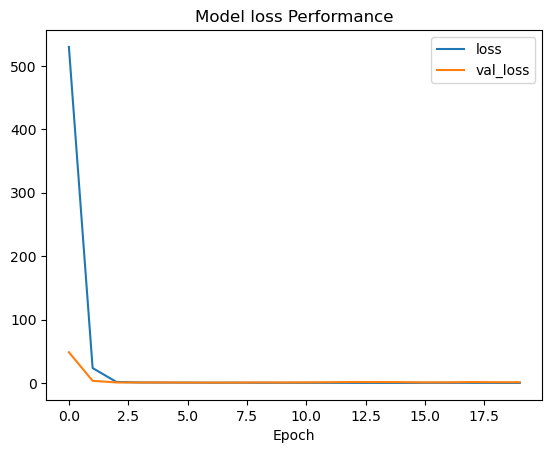

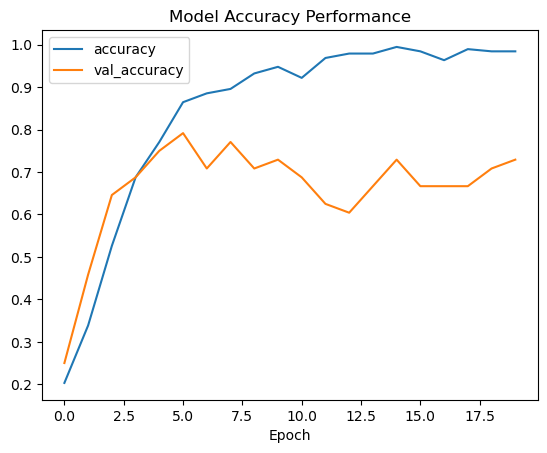

In [6]:
# Plot loss curves
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss Performance')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy Performance')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Validate

 Load a test image
 Sample images - 
 C:/Users/LENOVO/Desktop/Corn/Corn___Common_Rust/image (100).jpg
 C:/Users/LENOVO/Desktop/Corn/Corn___Gray_Leaf_Spot/image (100).jpg
 C:/Users/LENOVO/Desktop/Corn/Corn___Healthy/image (100).jpg
 C:/Users/LENOVO/Desktop/Corn/Corn___Northern_Leaf_Blight/image (100).jpg

In [7]:
img = cv2.imread('C:/Users/LENOVO/Desktop/Corn/Corn___Gray_Leaf_Spot/image (100).jpg')


resized_img = cv2.resize(img, (256, 256)) / 255.0
input_img = np.expand_dims(resized_img, 0)

# Perform prediction on the test image
prediction = model.predict(input_img)

predicted_class_index = np.argmax(prediction)

predicted_class_index 
predicted_class = class_names[np.argmax(prediction)]
print(f'Predicted class: {predicted_class}, index: {predicted_class_index}')

Predicted class: grey leaf spot, index: 1
